<a href="https://colab.research.google.com/github/daniyalaamir110/ML_course/blob/main/10_gradient_descent_linear_with_regularization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [2]:
np.random.seed(1)
X_train = np.random.rand(5, 3)
y_train = np.array([0, 1, 0, 1, 0])

In [3]:
def tabulate_data(x, y):
  n = len(x[0])
  m = len(x)
  fig, ax = plt.subplots(figsize=(4 * n, 1))
  cols = []
  col_labels = []
  for i in range(n):
    cols.append(x[:, i])
    col_labels.append(f"$x_{i}$")
  cols.append(y)
  col_labels.append("y")
  table_data = np.column_stack(cols)
  table = ax.table(cellText=table_data, colLabels=col_labels, loc='center')
  ax.axis('off')

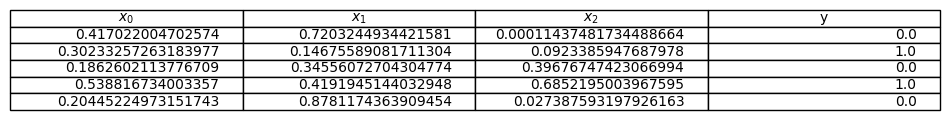

In [4]:
tabulate_data(X_train, y_train)

In [5]:
def compute_cost(x, y, w, b, lambda_ = 1):
  m, n = x.shape
  f_wb = np.dot(x, w) + b
  cost = (np.sum((f_wb - y) ** 2) + np.sum(w ** 2) * lambda_) / (2 * m)
  return cost

In [6]:
def compute_gradient(x, y, w, b, lambda_ = 1):
  m, n = x.shape
  f_wb = np.dot(x, w) + b
  dj_dw = (np.dot((f_wb - y), x) + lambda_ * w) / m
  dj_db = np.sum(f_wb - y) / m
  return dj_dw, dj_db

In [7]:
def gradient_descent(x, y, w_init, b_init, alpha, lambda_, iteration_count, cost_function, gradient_function):

  w = w_init
  b = b_init

  for i in range(iteration_count):
    if i == 0:
      print("FIRST ITERATION")
      dj_dw_ur, dj_db_ur = gradient_function(x, y, w, b, 0)
      w_ur = w - alpha * dj_dw_ur
      b_ur = b - alpha * dj_db_ur
      print(f"With lambda=0: \tw={w_ur}, b={b_ur}")

    dj_dw, dj_db = gradient_function(x, y, w, b, lambda_)

    w -= alpha * dj_dw
    b -= alpha * dj_db

    if i == 0:
      print(f"With lambda={lambda_}: \tw={w}, b={b}")

  return w, b

In [8]:
w_init = np.random.rand(X_train.shape[1])
b_init = 0.5
lambda_init = 0.7
tmp_alpha = 1.0e-2
lambda_ = 1
iterations = 1000

w_final, b_final = gradient_descent(X_train, y_train, w_init, b_init, tmp_alpha, lambda_, iterations, compute_cost, compute_gradient)

FIRST ITERATION
With lambda=0: 	w=[0.66844084 0.41297735 0.55730741], b=0.49335122543057425
With lambda=1: 	w=[0.66709991 0.41214274 0.55619003], b=0.49335122543057425


In [9]:
print(f"w = {w_final}, b = {b_final}")

w = [ 0.21988778 -0.22262774  0.22452408], b = 0.3707734598399827


In [10]:
def get_model_linear_regression(w, b):
  return lambda x: np.dot(x, w) + b

In [11]:
model = get_model_linear_regression(w_final, b_final)

In [12]:
X_pred = np.random.rand(5, 3)
y_pred = model(X_train)

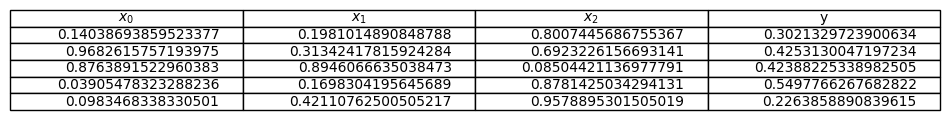

In [13]:
tabulate_data(X_pred, y_pred)